In [ ]:
%pip install sdv

In [166]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import poisson,skellam
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.pyplot import figure

In [4]:
#load the dataset
df = pd.read_csv("match_data.csv")
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [12]:
total_goals = df["home_score"] + df["away_score"]
df["total goals"] = total_goals
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total goals
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3


In [15]:
df.loc[[np.argmax(df["total goals"])]]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total goals
23796,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,31


In [17]:
#create a new dataframe
#truncate the date down to the year for simplicity
df2 = df.copy()
df2['date']=df2['date'].apply(lambda x : int(str.split(x,'-')[0]))
df2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total goals
0,1872,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873,England,Scotland,4,2,Friendly,London,England,False,6
2,1874,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3
3,1875,England,Scotland,2,2,Friendly,London,England,False,4
4,1876,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3


In [18]:
df2['date'].value_counts()
#we have 149 years of data

2019    1155
2008    1091
2011    1081
2004    1064
2000    1026
        ... 
1876       2
1874       1
1873       1
1875       1
1872       1
Name: date, Length: 149, dtype: int64

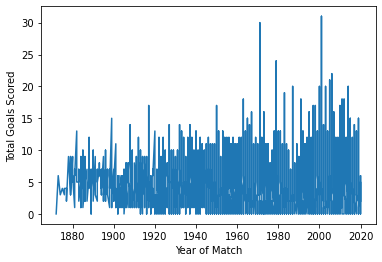

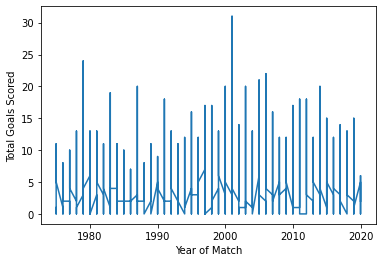

In [40]:
#restrict the date range
df3=df2.loc[(df2['date']>=1975)]
df3.head()
#produce a plot of data
plt.plot(df2['date'], df2["total goals"])
plt.xlabel("Year of Match")
plt.ylabel("Total Goals Scored")
plt.show()
#truncate the time range to 1975
plt.plot(df3['date'], df3["total goals"])
plt.xlabel("Year of Match")
plt.ylabel("Total Goals Scored")
plt.show()

In [41]:
#let's compute the mean to use in our poisson distribution
df3.iloc[[total_goals.argmax()]]
print(df3["total goals"].mean())

2.7152109548482604


Data was limited to years 1975 to 2020 from visual analysis of total number of goals scores, as can be seen in the comparison above, to control for historical differences in game play (such as fewer matches played overall). Lambda is the mean value of total number of goals scored, which is 2.72 for match years from 1975 to 2020.

In [178]:
from scipy.special import factorial
def poisson(k, l):
    prob= np.exp(-l)*np.power(l,k)/factorial(k)
    print(f'The chance of {k} goals is {100 * prob:.1f}%.')
    return prob

In [177]:
k=[]
prob=[]
l = 2.72
for i in range(10):
    prob.append(poisson(i,l)*100)
    k.append(i)

The chance of 0 goals is 6.6%.
The chance of 1 goals is 17.9%.
The chance of 2 goals is 24.4%.
The chance of 3 goals is 22.1%.
The chance of 4 goals is 15.0%.
The chance of 5 goals is 8.2%.
The chance of 6 goals is 3.7%.
The chance of 7 goals is 1.4%.
The chance of 8 goals is 0.5%.
The chance of 9 goals is 0.1%.


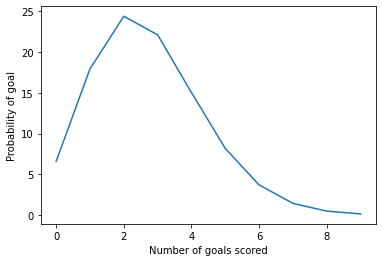

In [49]:
#plot of probability vs number of goals scored based on poisson distribution
figure(figsize=(15, 10), dpi=80)
plt.plot(k, prob)
plt.xlabel("Number of goals scored")
plt.ylabel("Probability of goal")
plt.show()

In [47]:
len(df3[(df3.home_team =='England') & (df3.away_team =='France')])
df3['home_team'] = df3['home_team'].apply(lambda x: (''.join(x.split())).lower())
df3['away_team'] = df3['away_team'].apply(lambda x: (''.join(x.split())).lower())

/var/folders/tx/s22c1s691rq4btjxs6l9d6cr0000gn/T/ipykernel_7857/3189471649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['home_team'] = df3['home_team'].apply(lambda x: (''.join(x.split())).lower())
/var/folders/tx/s22c1s691rq4btjxs6l9d6cr0000gn/T/ipykernel_7857/3189471649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['away_team'] = df3['away_team'].apply(lambda x: (''.join(x.split())).lower())


In [52]:
counts = np.random.poisson(2.72,10)
print(int(stats.mode(counts)[0]))

2


In [69]:
#df4 = df3.copy()
df4 = df3.iloc[:, 9]
print(df4)

9216     1
9217     0
9218     7
9219     4
9220     4
        ..
41635    1
41636    1
41637    2
41638    2
41639    2
Name: total goals, Length: 32424, dtype: int64


In [209]:

def PredictScore():
    
    home_team = input("Enter Home Team: ")
    ht = (''.join(home_team.split())).lower()
    away_team = input("Enter Away Team: ")
    at = (''.join(away_team.split())).lower()
    
    if len(df3[(df3.home_team ==ht) & (df3.away_team ==at)]) > 20:
        
        avg_home_score = df3[(df3.home_team ==ht) & (df3.away_team ==at)].home_score.mean()
        avg_away_score = df3[(df3.home_team ==ht) & (df3.away_team ==at)].away_score.mean()
        
        home_goal = int(stats.mode(np.random.poisson(avg_home_score,100000))[0])                    
        away_goal = int(stats.mode(np.random.poisson(avg_away_score,100000))[0])
        
    else:
        avg_home_goal_conceded = df3[(df3.home_team ==ht)].away_score.mean()
        avg_away_goal_scored   = df3[(df3.away_team ==at)].away_score.mean()
        away_goal = int(stats.mode(np.random.poisson(1/2*(avg_home_goal_conceded+avg_away_goal_scored),100000))[0])
        
        avg_away_goal_conceded = df3[(df3.home_team ==at)].home_score.mean()
        avg_home_goal_scored   = df3[(df3.away_team ==ht)].home_score.mean()
        home_goal = int(stats.mode(np.random.poisson(1/2*(avg_away_goal_conceded+avg_home_goal_scored),100000))[0])
    
    #avg_total_score = int(stats.mode(
        #np.random.poisson((df3[(df3.home_team ==ht) & (df3.away_team ==at)].df4.mean()),100000))[0])
    
    #print(f'Expected total goals are {avg_total_score}')
    print(f'They have played {len(df3[(df3.home_team ==ht) & (df3.away_team ==at)])} matches')
    print(f'The game score is predicted to be {home_team} {home_goal}:{away_goal} {away_team}')

In [210]:
PredictScore()

Enter Home Team: germany
Enter Away Team: england
They have played 9 matches
The game score is predicted to be germany 1:1 england


In [88]:
#applying poisson regression to the data
goal_model_data = pd.concat([df3[['home_team','away_team','home_score']].assign(home=1).rename(
            columns={'home_team':'team', 'away_team':'opponent','home_score':'goals'}),
           df3[['away_team','home_team','away_score']].assign(home=0).rename(
            columns={'away_team':'team', 'home_team':'opponent','away_score':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()


In [89]:
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                64848
Model:                            GLM   Df Residuals:                    64234
Model Family:                 Poisson   Df Model:                          613
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -91556.
Date:                Sat, 30 Apr 2022   Deviance:                       75428.
Time:                        19:58:32   Pearson chi2:                 6.91e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -0.5581      0.260     -2.145      0.032      -1.068      -0.048
team[T.afghanistan]                         -0.3830      0.209     -1.832      0.067      -0.793       0.027
team[T.albania]                              0.6068      0.196      3.096      0.002       0.223       0.991
team[T.alderney]                            -1.2930      0.326     -3.962      0.000      -1.933      -0.653
team[T.algeria]                              0.8221      0.191      4.314      0.000       0.449       1.195
team[T.americansamoa]                       -1.5441      0.252     -6.120      0.000      -2.039      -1.050
team[T.andalusia]                            1.1841      0.283      4.180      0.000       0.629       1.739
team[T.andorra]                             -0.6886      0.239     -2.886      0.004      -1.156      -0.221
team[T.angola]                               0.4939      0.193      2.557      0.011       0.115       0.872
team[T.anguilla]                            -1.3173      0.251     -5.252      0.000      -1.809      -0.826
team[T.antiguaandbarbuda]                   -0.0508      0.197     -0.257      0.797      -0.438       0.336
team[T.arameanssuryoye]                      0.1165      0.298      0.392      0.695      -0.467       0.700
team[T.argentina]                            1.4529      0.189      7.676      0.000       1.082       1.824
team[T.armenia]                              0.6477      0.198      3.266      0.001       0.259       1.036
team[T.artsakh]                              0.3649      0.245      1.488      0.137      -0.116       0.845
team[T.aruba]                               -0.3456      0.219     -1.577      0.115      -0.775       0.084
team[T.australia]                            0.9636      0.189      5.094      0.000       0.593       1.334
team[T.austria]                              1.1571      0.191      6.066      0.000       0.783       1.531
team[T.azerbaijan]                           0.2477      0.200      1.237      0.216      -0.145       0.640
team[T.bahamas]                             -0.6614      0.239     -2.769      0.006      -1.130      -0.193
team[T.bahrain]                              0.4917      0.191      2.575      0.010       0.117       0.866
team[T.bangladesh]                          -0.6243      0.201     -3.101      0.002      -1.019      -0.230
team[T.barawa]                              -0.8392      0.307     -2.736      0.006      -1.440      -0.238
team[T.barbados]                            -0.0403      0.197     -0.205      0.838      -0.426       0.345
team[T.basquecountry]                        1.5331      0.219      6.990      0.000       1.103       1.963
team[T.belarus]                

In [90]:
poisson_model.predict(pd.DataFrame(data={'team': 'england', 'opponent': 'germany',
                                       'home':1},index=[1]))


1    1.522881
dtype: float64

In [198]:
def simulate_match(match_model, home_team, away_team, max_goals=10):
    home_goals_avg = match_model.predict(pd.DataFrame(data={'team': home_team, 
                                                            'opponent': away_team,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = match_model.predict(pd.DataFrame(data={'team': away_team, 
                                                            'opponent': home_team,'home':0},
                                                      index=[1])).values[0]
    pred = [[stats.poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(pred[0]), np.array(pred[1])))



ger_eng = simulate_match(poisson_model, 'germany', 'england', max_goals=10)

In [199]:
#prob of home team win
print("Probability of home team win: {0:.3f}".format(np.sum(np.tril(ger_eng, -1))))
#prob of draw
print("Probability of a draw: {0:.3f}".format(np.sum(np.diag(ger_eng))))
#prob of away team win
print("Probability of home team loss: {0:.3f}".format(np.sum(np.triu(ger_eng, 1))))



ger_eng = simulate_match(poisson_model, 'germany', 'england', max_goals=10)

Probability of home team win: 0.456
Probability of a draw: 0.263
Probability of home team loss: 0.281


In [200]:
countries = df3.iloc[:, 2].str.split(';',expand=True).stack().unique()
count_countries = [m for m in range(len(countries))]

In [204]:
countries = df3.iloc[:, 2].str.split(';',expand=True).stack().unique()
count_countries = [m for m in range(len(countries))]
rev_countries = reversed(countries)
print("There are {var} countries in this football database.".format(var=len(countries)))
win = []
draw = []
loss = []
for i in countries:
    for j in rev_countries:
        simulation = simulate_match(poisson_model, i, j)
        prob_win = np.sum(np.tril(simulation, -1))
        prob_draw = np.sum(np.diag(simulation))
        prob_loss = np.sum(np.triu(simulation, 1))
        win.append(prob_win)
        draw.append(prob_draw)
        loss.append(prob_loss)
print("Win probabilities:", win)
print("Draw probabilities:", draw)
print("Loss probabilities:", loss)

There are 298 countries in this football database.
Win probabilities: [0.04591331310217553, 0.49451282369204386, 0.8710766174835902, 0.6111781466034273, 0.9552697337000402, 0.6553558137370279, 0.8434168947228209, 0.9155384086723299, 0.9484721957713943, 0.9310483341385994, 0.9565930746175317, 0.9290453696359647, 0.7267395857193131, 0.5258997054909137, 0.749942585983709, 0.7767106219705227, 0.9191137111083867, 0.9307392033037952, 0.06034335742090015, 0.8622949752189253, 0.8962002289178456, 0.7743019436796099, 0.7361275721558524, 0.9251367385281457, 0.21624951357464917, 0.9244392703482438, 0.6554660145894537, 0.7730848551288058, 0.6865109345167617, 7.131840185316905e-06, 0.4603959127151973, 0.5871585530868735, 0.7838926884251429, 0.007204472624367065, 0.9204035860785105, 0.5492656941409102, 0.939331766435765, 0.8836311231791989, 0.9352916400961777, 0.715767896221061, 0.5605531068298938, 0.6686601091455145, 0.16610634434720578, 0.9122952495843901, 0.35757552058250985, 0.8211739760998188, 0

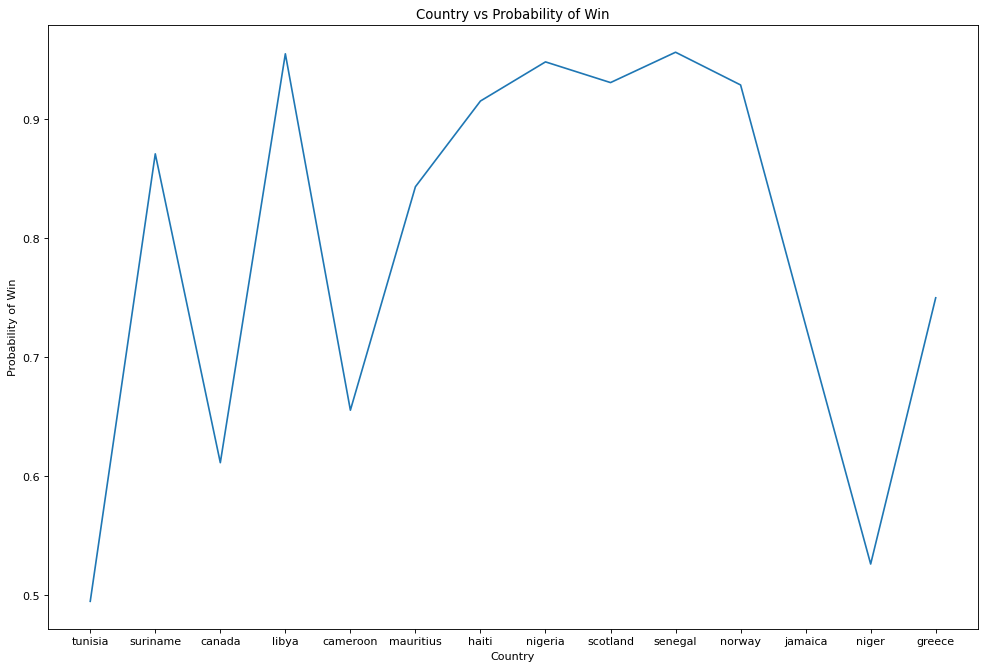

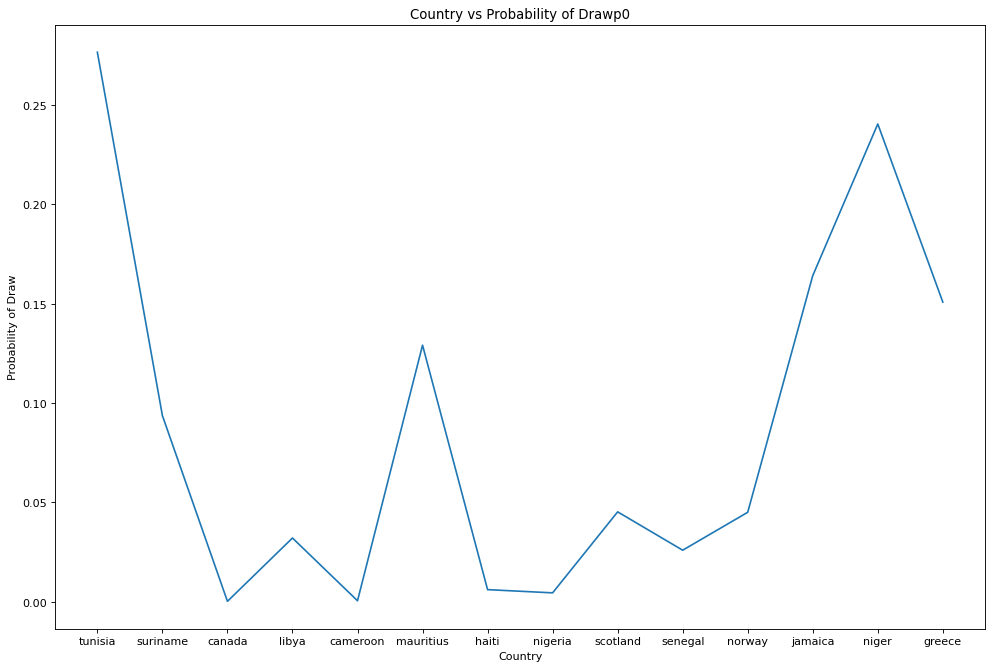

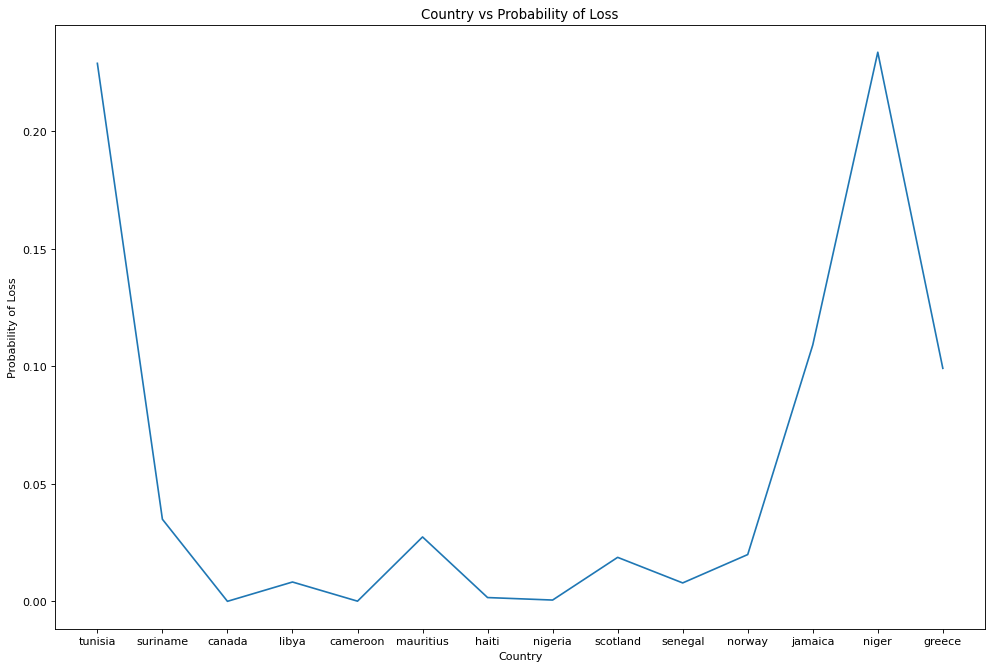

In [205]:
#plot some results
figure(figsize=(15, 10), dpi=80)
plt.plot(countries[1:15], win[1:15])
plt.title("Country vs Probability of Win")
plt.xlabel("Country")
plt.ylabel("Probability of Win")
plt.show()
figure(figsize=(15, 10), dpi=80)
plt.plot(countries[1:15], draw[1:15])
plt.title("Country vs Probability of Drawp0")
plt.xlabel("Country")
plt.ylabel("Probability of Draw")
plt.show()
figure(figsize=(15, 10), dpi=80)
plt.plot(countries[1:15], loss[1:15])
plt.title("Country vs Probability of Loss")
plt.xlabel("Country")
plt.ylabel("Probability of Loss")
plt.show()

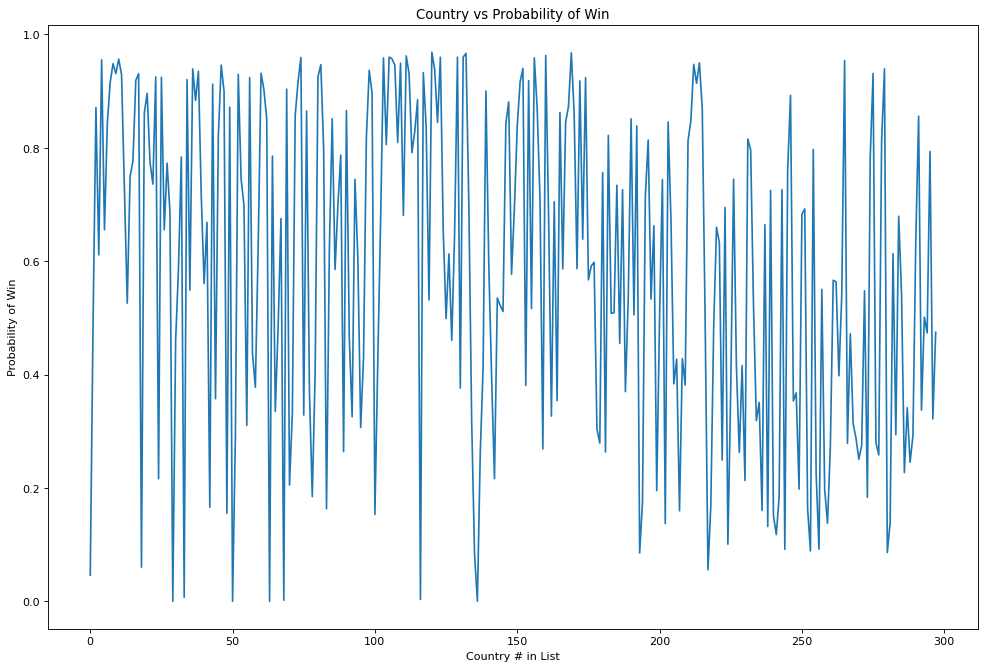

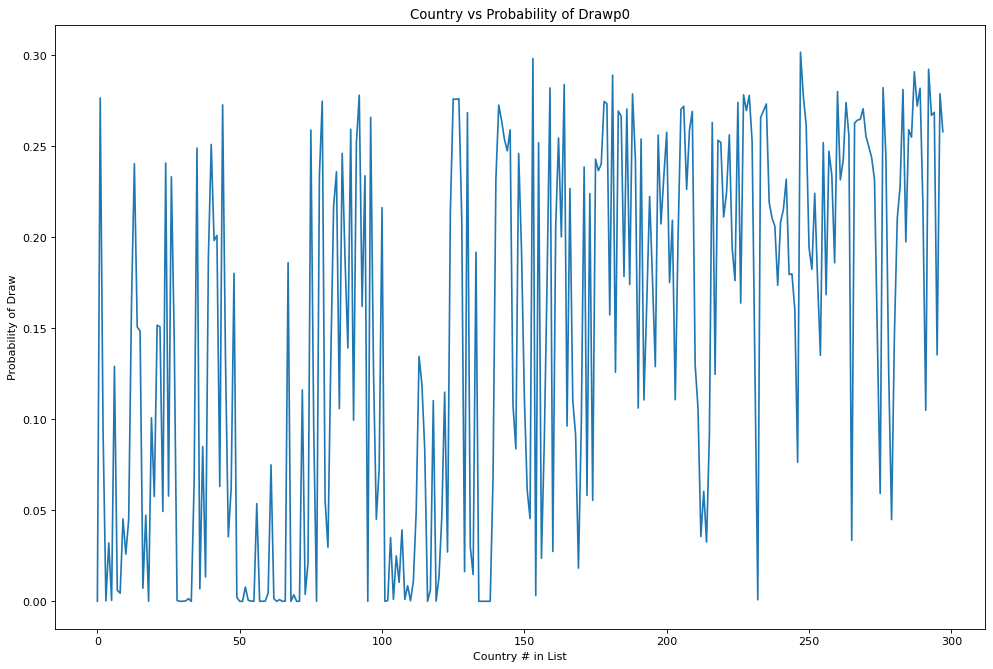

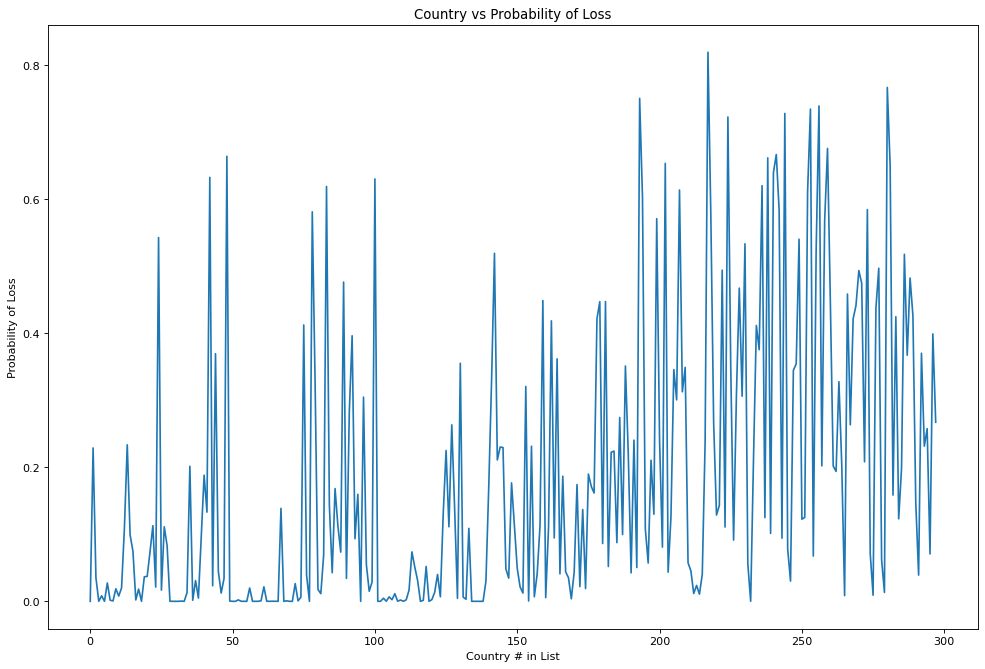

In [207]:
#plotting all the countries
figure(figsize=(15, 10), dpi=80)
plt.plot(count_countries, win)
plt.title("Country vs Probability of Win")
plt.xlabel("Country # in List")
plt.ylabel("Probability of Win")
plt.show()
figure(figsize=(15, 10), dpi=80)
plt.plot(count_countries, draw)
plt.title("Country vs Probability of Drawp0")
plt.xlabel("Country # in List")
plt.ylabel("Probability of Draw")
plt.show()
figure(figsize=(15, 10), dpi=80)
plt.plot(count_countries, loss)
plt.title("Country vs Probability of Loss")
plt.xlabel("Country # in List")
plt.ylabel("Probability of Loss")
plt.show()

In [208]:
import sdv
#synthetic data
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(df3)

/Users/meg/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/Users/meg/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/meg/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/meg/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/meg/opt/anaconda3/lib/python3.9/sit

In [ ]:
sample = model.sample(200)
sample.head()

In [ ]:
countries_fake = sample.iloc[:, 2].str.split(';',expand=True).stack().unique()
rev_countries_fake = reversed(countries_fake)
print("There are {var} countries in this football database.".format(var=len(countries_fake)))
win_fake = []
draw_fake = []
loss_fake = []
for i_fake in countries_fake:
    for j_fake in rev_countries_fake:
        simulation_fake = simulate_match(poisson_model, i_fake, j_fake)
        prob_win_fake = np.sum(np.tril(simulation_fake, -1))
        prob_draw_fake = np.sum(np.diag(simulation_fake))
        prob_loss_fake = np.sum(np.triu(simulation_fake, 1))
        win_fake.append(prob_win_fake)
        draw_fake.append(prob_draw_fake)
        loss_fake.append(prob_loss_fake)
print("Win probabilities:", win_fake)
print("Draw probabilities:", draw_fake)
print("Loss probabilities:", loss_fake)